# Project Planning

## Goal:

The goal is to find ways to improve the Zestimate so that it more accurately reflects the actual sale price. This will be done by determining which variables affect `logerror` and to what extent.|

## Deliverables:

1. A report that will summarize my findings in regards to how to improve the Zestimate.
2. A notebook that will show the work I did to reach my findings. It will be made available so that my work can be reproduced if desired.

## Data Dictionary:

- `logerror` - The log of the difference between the property's Zestimate and the actual sale price.
- `bathroomcnt` - The number of bathrooms (with halves) if the property is a home.
- `bedroomcnt` - The number of bedrooms (with halves) if the property is a home.
- `calculatedfinishedsquarefeet` - The calculated finished living area if the property is a home.
- `fullbathcnt` - Number of bathrooms that have a sink, shower, bathtub, and toilet.
- `garagecarcnt` - Total number of garages on lot.
- `roomcnt` - Total number of rooms.
- `yearbuilt` - Year that the first home was built.
- `taxvaluedollarcnt` - The total tax assessed.
- `taxamount` - The property tax assessed for that year.
- `regionidzip` - Zipcode of where the property is located.

## Brainstorming/Hypotheses:

##### What can be causing inaccurate estimates? 
- Any inaccuracies due to these variables can be due to how much value is being placed on a variable. Perhaps `yearbuilt` doesn't matter too much but it is given more weight in the estimate than it should have.
- Perhaps a variable isn't being accounted for, like the condition of the property. Vice versa, maybe a variable shouldn't be included in the valuation.

##### Do any of these variables stand out?

Initial impressions are that `taxamount` will be important in minimizing error since it is based on a valuation of the property itself. `garagecarcnt` is something that can vary in regards to importance to buyer. Due to this, it can lead to error when trying to accurately estimate what a property is worth.

##### Do any independent variables relate to each other?

`roomcnt` and `bedroomcnt` must relate to each other since they are both room counts (`bathroomcnt` can be included in that). `roomcnt` and `calculatedfinishedsquarefeet` can also have a correlation. `taxvaluedollarcnt` and `taxamount` may also be correlated.

##### Any additional features to consider?

I think having data on the following features and using them in the valuation of a property might help make the Zestimate more accurate:
- condition of property
- have a way to account for the amount of time the property has been on sale


# Data Acquisition

Imports

In [1]:
%matplotlib inline
# from env import user, password, host, get_connection, describe_tables
import numpy as np

# Acquisition
import pandas as pd

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring
import scipy.stats as stats

# Modeling
import statsmodels.api as sm

from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.feature_selection import f_regression
# from env import path


Collecting data from `properties_2016.csv` and learning what it looks like.

In [2]:
all_zillow = pd.read_csv('properties_2016.csv')

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
all_zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

In [4]:
properties = all_zillow[['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'garagecarcnt', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount'
#                          , 'regionidzip'
                        ]]
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 10 columns):
parcelid                        int64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
fullbathcnt                     float64
garagecarcnt                    float64
roomcnt                         float64
yearbuilt                       float64
taxvaluedollarcnt               float64
taxamount                       float64
dtypes: float64(9), int64(1)
memory usage: 227.8 MB


Looking at nulls.

In [5]:
properties.isna().sum()

parcelid                              0
bathroomcnt                       11462
bedroomcnt                        11450
calculatedfinishedsquarefeet      55565
fullbathcnt                      128912
garagecarcnt                    2101950
roomcnt                           11475
yearbuilt                         59928
taxvaluedollarcnt                 42550
taxamount                         31250
dtype: int64

Checking for duplicates in the `parcelid` column.

In [6]:
properties.parcelid.value_counts()

12584959    1
12755709    1
12751611    1
12753658    1
12747513    1
12749560    1
12776183    1
12778230    1
12772085    1
12774132    1
12767987    1
12770034    1
12763889    1
12729070    1
12722925    1
12724972    1
12718827    1
12720874    1
12714729    1
12743399    1
12745446    1
12757756    1
12761854    1
12741348    1
12759807    1
14016022    1
12820200    1
12427380    1
17066269    1
11446598    1
           ..
10861026    1
10854881    1
10856928    1
10768863    1
10770910    1
10764765    1
10766812    1
10824176    1
10828274    1
10826227    1
10834431    1
12253706    1
12247561    1
12227079    1
12222981    1
12225028    1
12237314    1
12231169    1
12233216    1
10836478    1
10815988    1
10830333    1
10832380    1
10842619    1
10844666    1
10838521    1
10840568    1
10820086    1
10813941    1
12582912    1
Name: parcelid, Length: 2985217, dtype: int64

Reading in the table that contains `logerror`.

In [7]:
error = pd.read_csv('train_2016_v2.csv')
error.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


Looks like there are duplicates in the `parcelid` column. 

In [8]:
error.parcelid.value_counts()

11842707    3
12613442    2
12032773    2
11729067    2
11845988    2
14753974    2
12779635    2
11188497    2
10883535    2
10790468    2
10798910    2
14678446    2
12689560    2
10796614    2
14316410    2
11633771    2
12023571    2
14667297    2
14294516    2
12715657    2
14444102    2
14022812    2
12978851    2
14057417    2
11135845    2
11477350    2
11146377    2
11866315    2
11602482    2
14500952    2
           ..
11240334    1
11320206    1
10739089    1
12123282    1
10741142    1
12031384    1
14130585    1
12027290    1
12862962    1
12756350    1
17197466    1
11046267    1
10910830    1
14202253    1
11038055    1
11104576    1
17265761    1
12858732    1
14604356    1
12068206    1
14210190    1
14736753    1
14599538    1
14601587    1
14613877    1
11199862    1
11726199    1
12096888    1
11181433    1
12438686    1
Name: parcelid, Length: 90150, dtype: int64

In [9]:
error.loc[error.parcelid == 11842707]

# error.parcelid.value_counts()

,parcelid,logerror,transactiondate
55794,11842707,-0.0284,2016-07-14
55795,11842707,0.0573,2016-08-22
55796,11842707,0.2078,2016-09-29


In [10]:
properties.loc[properties.parcelid == 11842707]

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount
1194750,11842707,2.0,3.0,1142.0,2.0,NaN,0.0,1922.0,614764.0,17087.75


The mean of the `logerror` is taken for duplicates so that each `parcelid` corresponds with only one `logerror` value. This lets us keep those instances in the dataframe while also not having multiple outcomes for the same set of independent variables.

In [11]:
mean_error = error[['parcelid', 'logerror', 'transactiondate']].groupby('parcelid', as_index=False).mean()
mean_error.loc[mean_error.parcelid == 11842707]

,parcelid,logerror
28922,11842707,0.0789


134090     1350.0
164588      676.0
1399210     184.0
2409176     312.0
862797      802.0
1576873     540.0
1443371     700.0
535796      485.0
1309053     260.0
685071      196.0
Name: basementsqft, dtype: float64

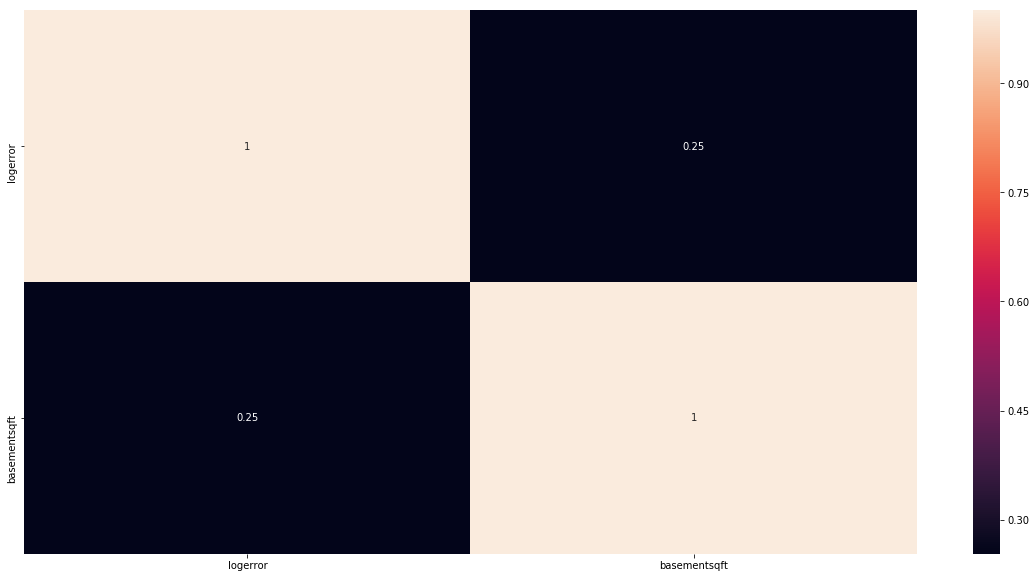

In [139]:
joined = properties.join(mean_error.set_index('parcelid'), on='parcelid', how='inner')
joined.loc[joined.parcelid == 11842707]

# the portion below was used to make a heatmap of all variables and their correlation with logerror.

test_joined = all_zillow.join(mean_error.set_index('parcelid'), on='parcelid', how='inner')
test_joined.head()
test_joined.drop(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'garagecarcnt', 'regionidzip', 'yearbuilt', 'taxamount', 'taxvaluedollarcnt'], axis=1)
test_joined.isna().sum()

plt.figure(figsize=(20,10))
sns.heatmap(test_joined[['logerror', 'basementsqft']].corr(), annot=True)

test_joined.basementsqft.dropna().sample(10)

In [13]:
joined.count()

parcelid                        90150
bathroomcnt                     90150
bedroomcnt                      90150
calculatedfinishedsquarefeet    89492
fullbathcnt                     88974
garagecarcnt                    29897
roomcnt                         90150
yearbuilt                       89397
taxvaluedollarcnt               90149
taxamount                       90144
logerror                        90150
dtype: int64

In [14]:
joined.isna().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
calculatedfinishedsquarefeet      658
fullbathcnt                      1176
garagecarcnt                    60253
roomcnt                             0
yearbuilt                         753
taxvaluedollarcnt                   1
taxamount                           6
logerror                            0
dtype: int64

In [15]:
joined.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror
count,9.015000e+04,90150.000000,90150.000000,89492.000000,88974.000000,29897.000000,90150.000000,89397.000000,9.014900e+04,90144.000000,90150.000000
mean,1.298488e+07,2.279545,3.031936,1773.096869,2.241172,1.812055,1.478580,1968.539761,4.576379e+05,5983.070888,0.011472
std,2.505517e+06,1.004133,1.156114,928.136339,0.963106,0.608865,2.819802,23.763165,5.548532e+05,6838.506814,0.160949
min,1.071174e+07,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000
25%,1.155970e+07,2.000000,2.000000,1184.000000,2.000000,2.000000,0.000000,1953.000000,1.990560e+05,2873.260000,-0.025300
50%,1.254744e+07,2.000000,3.000000,1540.000000,2.000000,2.000000,0.000000,1970.000000,3.429310e+05,4543.100000,0.006000
75%,1.422757e+07,3.000000,4.000000,2095.000000,3.000000,2.000000,0.000000,1987.000000,5.405890e+05,6900.165000,0.039200
max,1.629608e+08,20.000000,16.000000,22741.000000,20.000000,24.000000,18.000000,2015.000000,2.775000e+07,321936.090000,4.737000


Notice that `roomcnt` has a lot of 0's

Handling properties with null values for `calculatedfinishedsquarefeet`. If `roomcnt`, `bedroomcnt`, and `bathroomcnt` are `0` then it is most likely just a lot and not a house.

Decision needs to be made to keep `roomcnt` or drop the column. Looking at some random rows, `roomcnt` in general is the sum of `bedroomcnt` and `bathroomcnt`. This means that we'll still be capturing some of that information through those variables. We will drop `roomcnt`.

In [16]:
joined.drop('roomcnt', axis=1, inplace=True)
joined.sample(10)

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror
1115919,17154668,1.0,2.0,1201.0,1.0,1.0,1964.0,221192.0,2608.68,0.1765
1761671,12216901,3.0,3.0,1246.0,3.0,NaN,1993.0,180151.0,2562.40,0.1062
1054204,14725960,2.0,3.0,1460.0,2.0,1.0,1982.0,233903.0,2461.62,-0.0060
2761014,13878507,2.0,3.0,1248.0,2.0,NaN,1980.0,341121.0,4273.86,0.0010
91020,10876330,1.0,3.0,1201.0,1.0,NaN,1951.0,61351.0,798.83,0.2103
335654,12715078,2.0,2.0,1367.0,2.0,NaN,1965.0,223586.0,3078.17,0.0392
473674,14478325,4.5,5.0,3717.0,4.0,2.0,1997.0,971059.0,9500.26,-0.0513
2016596,12804729,1.0,2.0,880.0,1.0,NaN,1947.0,245597.0,3304.26,-0.0243
177201,11237337,3.0,3.0,2270.0,3.0,NaN,2001.0,278688.0,5396.94,-0.0758
1805629,11983438,6.0,6.0,6508.0,6.0,NaN,1927.0,5531872.0,67940.21,0.0639


In [17]:
joined.loc[(joined.calculatedfinishedsquarefeet.isnull()) 
            & (joined.bathroomcnt == float(0))
            & (joined.bedroomcnt == float(0)), 'calculatedfinishedsquarefeet'] = 0




In [18]:
joined.isna().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
calculatedfinishedsquarefeet        9
fullbathcnt                      1176
garagecarcnt                    60253
yearbuilt                         753
taxvaluedollarcnt                   1
taxamount                           6
logerror                            0
dtype: int64

In [19]:
joined.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror
count,9.015000e+04,90150.000000,90150.000000,90141.000000,88974.000000,29897.000000,89397.000000,9.014900e+04,90144.000000,90150.000000
mean,1.298488e+07,2.279545,3.031936,1760.330871,2.241172,1.812055,1968.539761,4.576379e+05,5983.070888,0.011472
std,2.505517e+06,1.004133,1.156114,936.860408,0.963106,0.608865,23.763165,5.548532e+05,6838.506814,0.160949
min,1.071174e+07,0.000000,0.000000,0.000000,1.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000
25%,1.155970e+07,2.000000,2.000000,1176.000000,2.000000,2.000000,1953.000000,1.990560e+05,2873.260000,-0.025300
50%,1.254744e+07,2.000000,3.000000,1535.000000,2.000000,2.000000,1970.000000,3.429310e+05,4543.100000,0.006000
75%,1.422757e+07,3.000000,4.000000,2089.000000,3.000000,2.000000,1987.000000,5.405890e+05,6900.165000,0.039200
max,1.629608e+08,20.000000,16.000000,22741.000000,20.000000,24.000000,2015.000000,2.775000e+07,321936.090000,4.737000


In [20]:
joined.loc[(joined.garagecarcnt.isnull()) 
            & (joined.bathroomcnt == float(0))
            & (joined.bedroomcnt == float(0)), 'garagecarcnt'] = 0


In [21]:
joined.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror
count,9.015000e+04,90150.000000,90150.000000,90141.000000,88974.000000,30831.000000,89397.000000,9.014900e+04,90144.000000,90150.000000
mean,1.298488e+07,2.279545,3.031936,1760.330871,2.241172,1.757160,1968.539761,4.576379e+05,5983.070888,0.011472
std,2.505517e+06,1.004133,1.156114,936.860408,0.963106,0.675239,23.763165,5.548532e+05,6838.506814,0.160949
min,1.071174e+07,0.000000,0.000000,0.000000,1.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000
25%,1.155970e+07,2.000000,2.000000,1176.000000,2.000000,1.000000,1953.000000,1.990560e+05,2873.260000,-0.025300
50%,1.254744e+07,2.000000,3.000000,1535.000000,2.000000,2.000000,1970.000000,3.429310e+05,4543.100000,0.006000
75%,1.422757e+07,3.000000,4.000000,2089.000000,3.000000,2.000000,1987.000000,5.405890e+05,6900.165000,0.039200
max,1.629608e+08,20.000000,16.000000,22741.000000,20.000000,24.000000,2015.000000,2.775000e+07,321936.090000,4.737000


In [22]:
joined.isna().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
calculatedfinishedsquarefeet        9
fullbathcnt                      1176
garagecarcnt                    59319
yearbuilt                         753
taxvaluedollarcnt                   1
taxamount                           6
logerror                            0
dtype: int64

Tried to fill in `garagecarcnt` but still 59000+ empty values. Dropping `garagecarcnt`.

In [23]:
joined.drop('garagecarcnt', axis=1, inplace=True)
joined.sample(10)

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror
163321,14682745,2.5,2.0,1304.0,2.0,2010.0,390945.0,4783.80,0.0129
2044040,12230531,1.0,2.0,576.0,1.0,1949.0,208000.0,3818.32,0.4574
1386661,11408294,2.0,3.0,1595.0,2.0,1964.0,306000.0,5057.23,0.0070
252349,17156542,2.5,3.0,1361.0,2.0,1980.0,262219.0,2998.14,0.0440
2205248,11639126,6.0,6.0,3658.0,6.0,1951.0,1911387.0,22630.96,0.0971
656359,10924408,2.0,3.0,1515.0,2.0,1965.0,185016.0,2443.94,0.0431
2456119,11092814,3.0,4.0,2925.0,3.0,1977.0,625726.0,8233.02,-0.0998
416869,17088793,1.0,2.0,777.0,1.0,1987.0,173156.0,1884.98,0.0611
2843805,11474996,2.0,2.0,1029.0,2.0,1971.0,325000.0,4654.32,-0.0619
2315493,13968479,3.0,4.0,2292.0,3.0,1974.0,653000.0,7636.76,0.0779


In [24]:
joined.count()

parcelid                        90150
bathroomcnt                     90150
bedroomcnt                      90150
calculatedfinishedsquarefeet    90141
fullbathcnt                     88974
yearbuilt                       89397
taxvaluedollarcnt               90149
taxamount                       90144
logerror                        90150
dtype: int64

In [25]:
joined.isna().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedfinishedsquarefeet       9
fullbathcnt                     1176
yearbuilt                        753
taxvaluedollarcnt                  1
taxamount                          6
logerror                           0
dtype: int64

Going to fill in null values in `fullbathcnt` if `bathroomcnt` and `bedroomcnt` are 0.

In [26]:
joined.loc[joined.fullbathcnt.isna()].sample(10)

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror
2408794,10828385,0.0,0.0,0.0,NaN,NaN,134127.0,1644.22,-0.0460
1884324,13866014,0.0,0.0,3722.0,NaN,1963.0,1100000.0,13098.78,-0.0294
73995,11611410,0.0,0.0,6020.0,NaN,2010.0,3229661.0,40129.45,0.1432
2528396,17160906,0.0,0.0,3940.0,NaN,1974.0,152003.0,1901.54,-0.1312
2688872,14447608,0.0,0.0,3488.0,NaN,1965.0,3553349.0,37820.70,0.0564
594774,14366840,0.0,0.0,0.0,NaN,NaN,805135.0,8502.38,-0.0050
2731168,13875573,0.0,0.0,2241.0,NaN,1964.0,172250.0,2376.56,0.1345
2676874,17150193,0.0,4.0,2133.0,NaN,1997.0,312796.0,3870.18,-0.0790
1561435,11240014,0.0,0.0,0.0,NaN,NaN,16108.0,2126.09,-0.0253
1561456,17259383,0.0,0.0,0.0,NaN,NaN,17691.0,226.30,0.4350


In [27]:
joined.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror
count,9.015000e+04,90150.000000,90150.000000,90141.000000,88974.000000,89397.000000,9.014900e+04,90144.000000,90150.000000
mean,1.298488e+07,2.279545,3.031936,1760.330871,2.241172,1968.539761,4.576379e+05,5983.070888,0.011472
std,2.505517e+06,1.004133,1.156114,936.860408,0.963106,23.763165,5.548532e+05,6838.506814,0.160949
min,1.071174e+07,0.000000,0.000000,0.000000,1.000000,1885.000000,2.200000e+01,49.080000,-4.605000
25%,1.155970e+07,2.000000,2.000000,1176.000000,2.000000,1953.000000,1.990560e+05,2873.260000,-0.025300
50%,1.254744e+07,2.000000,3.000000,1535.000000,2.000000,1970.000000,3.429310e+05,4543.100000,0.006000
75%,1.422757e+07,3.000000,4.000000,2089.000000,3.000000,1987.000000,5.405890e+05,6900.165000,0.039200
max,1.629608e+08,20.000000,16.000000,22741.000000,20.000000,2015.000000,2.775000e+07,321936.090000,4.737000


In [28]:
joined.loc[(joined.bathroomcnt == float(0)) & (joined.bedroomcnt == float(0)) & (joined.fullbathcnt.isna()), 'fullbathcnt'] = 0
joined.isna().sum()

parcelid                          0
bathroomcnt                       0
bedroomcnt                        0
calculatedfinishedsquarefeet      9
fullbathcnt                      39
yearbuilt                       753
taxvaluedollarcnt                 1
taxamount                         6
logerror                          0
dtype: int64

In [29]:
joined.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror
count,9.015000e+04,90150.000000,90150.000000,90141.000000,90111.000000,89397.000000,9.014900e+04,90144.000000,90150.000000
mean,1.298488e+07,2.279545,3.031936,1760.330871,2.212893,1968.539761,4.576379e+05,5983.070888,0.011472
std,2.505517e+06,1.004133,1.156114,936.860408,0.989165,23.763165,5.548532e+05,6838.506814,0.160949
min,1.071174e+07,0.000000,0.000000,0.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000
25%,1.155970e+07,2.000000,2.000000,1176.000000,2.000000,1953.000000,1.990560e+05,2873.260000,-0.025300
50%,1.254744e+07,2.000000,3.000000,1535.000000,2.000000,1970.000000,3.429310e+05,4543.100000,0.006000
75%,1.422757e+07,3.000000,4.000000,2089.000000,3.000000,1987.000000,5.405890e+05,6900.165000,0.039200
max,1.629608e+08,20.000000,16.000000,22741.000000,20.000000,2015.000000,2.775000e+07,321936.090000,4.737000


Removing the remaining rows that have null values.

In [30]:
joined_nonull = joined.dropna(subset=['yearbuilt', 'taxvaluedollarcnt', 'taxamount',
#                                       'regionidzip',
                                      'calculatedfinishedsquarefeet', 'fullbathcnt'])
joined_nonull.count()

parcelid                        89349
bathroomcnt                     89349
bedroomcnt                      89349
calculatedfinishedsquarefeet    89349
fullbathcnt                     89349
yearbuilt                       89349
taxvaluedollarcnt               89349
taxamount                       89349
logerror                        89349
dtype: int64

In [31]:
joined_nonull.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fullbathcnt                     0
yearbuilt                       0
taxvaluedollarcnt               0
taxamount                       0
logerror                        0
dtype: int64

In [32]:
joined_nonull.head(10)

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror
362,17073783,2.5,3.0,1264.0,2.0,1986.0,191811.0,2015.06,0.0953
428,17088994,1.0,2.0,777.0,1.0,1990.0,239679.0,2581.30,0.0198
470,17100444,2.0,3.0,1101.0,2.0,1956.0,47853.0,591.64,0.0060
480,17102429,1.5,2.0,1554.0,1.0,1965.0,62914.0,682.78,-0.0566
507,17109604,2.5,4.0,2415.0,2.0,1984.0,554000.0,5886.92,0.0573
555,17125829,2.5,4.0,2882.0,2.0,1980.0,289609.0,3110.44,0.0564
570,17132911,2.0,3.0,1772.0,2.0,1978.0,526000.0,5632.20,0.0315
580,17134926,2.5,5.0,2632.0,2.0,1971.0,571086.0,6109.94,0.0257
605,17139988,2.0,3.0,1292.0,2.0,1979.0,462594.0,5026.40,0.0020
719,17167359,1.0,3.0,1385.0,1.0,1950.0,268502.0,3217.06,-0.0576


Making a list of the columns in the DataFrame.

In [33]:
colnames = joined_nonull.columns
colnames

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fullbathcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount',
       'logerror'],
      dtype='object')

Making a list of the independent variables.

In [34]:
attributes = colnames[1:].drop('logerror')
attributes

Index(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fullbathcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount'],
      dtype='object')

Our independent variable is `logerror`. It is continuous.

Boxplots and hsitograms of all the variables to get a better idea of their distributions.

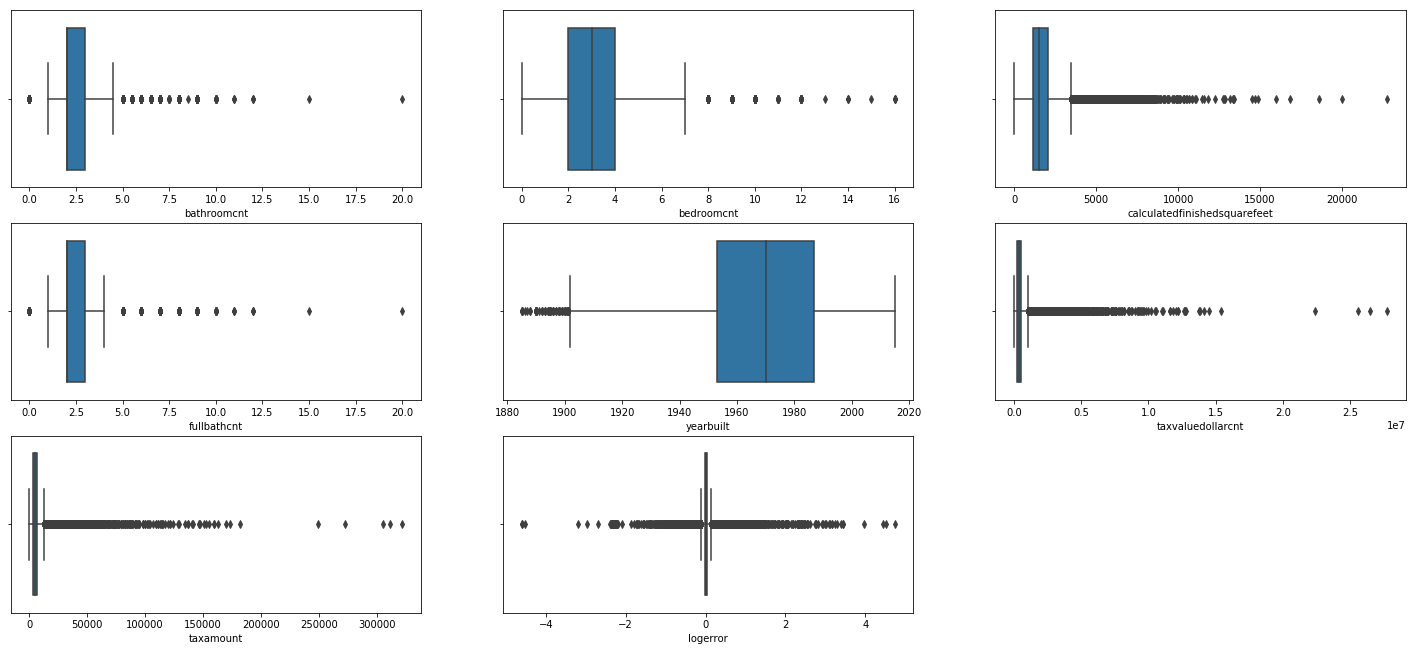

In [35]:
plt.figure(figsize=(25,15))

for i, column in enumerate(joined_nonull.drop('parcelid', axis=1)):
    plt.subplot(4, 3, (i+1))
    sns.boxplot(joined_nonull[column])
    
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


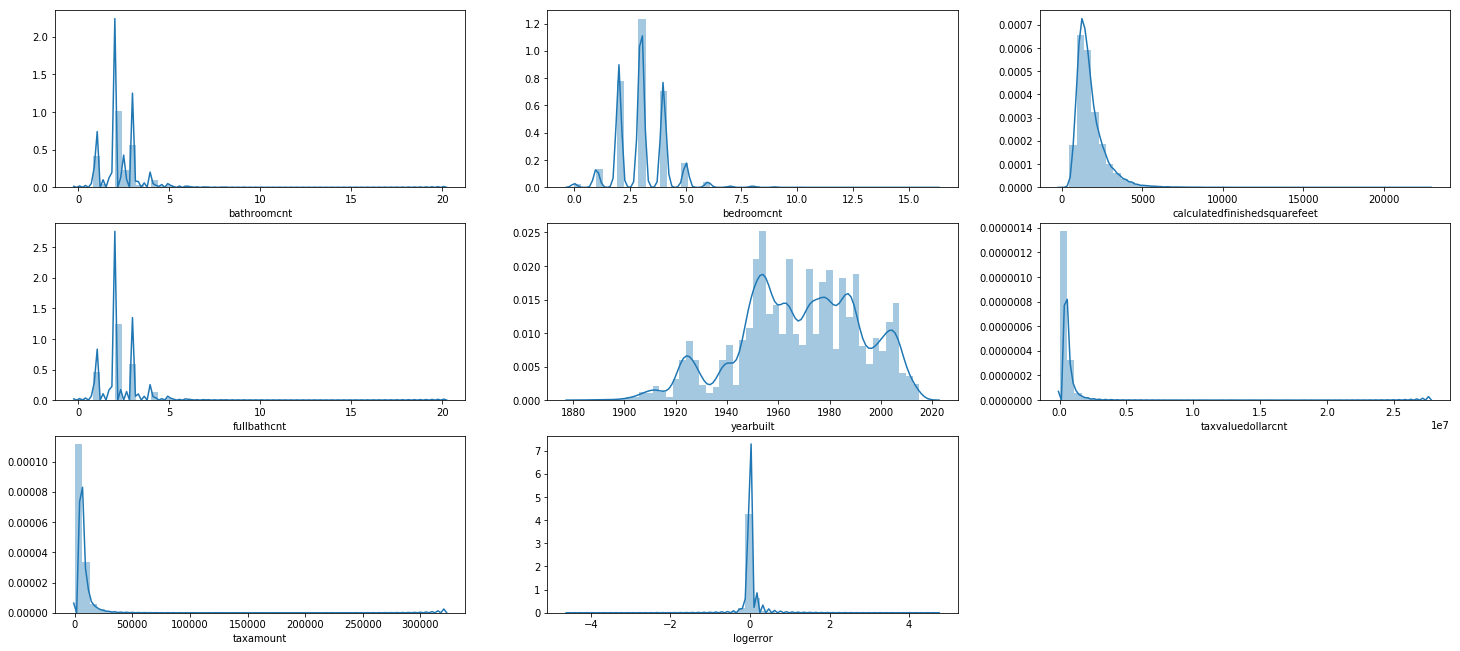

In [125]:
plt.figure(figsize=(25,15))

for i, column in enumerate(joined_nonull.drop('parcelid', axis=1)):
    plt.subplot(4, 3, (i+1))
    sns.distplot(joined_nonull[column])
    
plt.show()

Attempting to apply min-max normalization to the DataFrame.

In [37]:
# normalized_zillow = (joined_nonull-joined_nonull.min())/(joined_nonull.max()-joined_nonull.min())
# normalized_zillow.sample(10)

# # That normalized all columns. Need to undo that for parcelid, yearbuilt, regionidzip

# normalized_zillow['parcelid'] = normalized_zillow.parcelid * (joined_nonull.parcelid.max()-joined_nonull.parcelid.min()) + joined_nonull.parcelid.min()
# # normalized_zillow['yearbuilt'] = normalized_zillow.yearbuilt * (joined.yearbuilt.max()-joined.yearbuilt.min()) + joined.yearbuilt.min()
# # normalized_zillow['regionidzip'] = normalized_zillow.regionidzip * (joined.regionidzip.max()-joined.regionidzip.min()) + joined.regionidzip.min()
# normalized_zillow.sample(10)




In [38]:
# normalized_zillow.describe()

In [116]:
joined_nonull.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror
count,8.934900e+04,89349.000000,89349.000000,89349.000000,89349.000000,89349.000000,8.934900e+04,89349.000000,89349.000000
mean,1.297910e+07,2.296730,3.053341,1772.008719,2.229057,1968.539066,4.577191e+05,5973.702289,0.011502
std,2.507548e+06,0.987205,1.128421,927.372036,0.973528,23.760946,5.530542e+05,6799.717097,0.159543
min,1.071174e+07,0.000000,0.000000,0.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000
25%,1.155877e+07,2.000000,2.000000,1183.000000,2.000000,1953.000000,2.004040e+05,2881.430000,-0.025300
50%,1.254587e+07,2.000000,3.000000,1540.000000,2.000000,1970.000000,3.436850e+05,4546.480000,0.006000
75%,1.422256e+07,3.000000,4.000000,2094.000000,3.000000,1987.000000,5.409870e+05,6896.710000,0.038300
max,1.629608e+08,20.000000,16.000000,22741.000000,20.000000,2015.000000,2.775000e+07,321936.090000,4.737000


In [117]:
perfect_est = joined_nonull.loc[joined_nonull.logerror == 0]
perfect_est.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror
count,8.380000e+02,838.000000,838.000000,838.000000,838.000000,838.000000,8.380000e+02,838.000000,838.0
mean,1.319003e+07,2.279236,3.039379,1740.144391,2.192124,1972.307876,4.409341e+05,5727.267924,0.0
std,1.790015e+06,0.881686,1.091786,838.568567,0.874481,22.696180,4.160098e+05,5261.973339,0.0
min,1.072143e+07,0.000000,0.000000,456.000000,0.000000,1885.000000,1.776100e+04,349.560000,0.0
25%,1.162246e+07,2.000000,2.000000,1194.000000,2.000000,1956.000000,2.266405e+05,3134.672500,0.0
50%,1.285335e+07,2.000000,3.000000,1508.000000,2.000000,1974.000000,3.693080e+05,4671.435000,0.0
75%,1.444020e+07,3.000000,4.000000,2050.000000,3.000000,1989.000000,5.289445e+05,6747.630000,0.0
max,1.730007e+07,6.000000,12.000000,7926.000000,6.000000,2014.000000,5.500000e+06,65090.820000,0.0


In [124]:
joined_nonull.loc[joined_nonull.taxamount <= 65090].describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror
count,8.921000e+04,89210.000000,89210.000000,89210.000000,89210.000000,89210.000000,8.921000e+04,89210.000000,89210.000000
mean,1.298012e+07,2.290657,3.050308,1764.118675,2.223148,1968.526331,4.462900e+05,5826.059802,0.011464
std,2.508955e+06,0.972380,1.125125,897.144051,0.959251,23.748773,4.418368e+05,5383.272541,0.159045
min,1.071174e+07,0.000000,0.000000,0.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000
25%,1.155774e+07,2.000000,2.000000,1182.000000,2.000000,1953.000000,2.000000e+05,2878.087500,-0.025300
50%,1.254645e+07,2.000000,3.000000,1538.000000,2.000000,1970.000000,3.432430e+05,4541.255000,0.006000
75%,1.422289e+07,3.000000,4.000000,2090.000000,3.000000,1987.000000,5.395688e+05,6882.325000,0.038300
max,1.629608e+08,20.000000,16.000000,22741.000000,20.000000,2015.000000,7.000000e+06,64701.010000,4.737000


# Data Exploration

Splitting the data into separate train and test sets.

In [39]:
# X = normalized_zillow.drop(['parcelid', 'logerror'], axis=1)
# y = normalized_zillow[['logerror']]

X = joined_nonull.drop(['parcelid', 'logerror'], axis=1)
y = joined_nonull[['logerror']]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.60)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(53609, 7)
(53609, 1)
(35740, 7)
(35740, 1)


In [42]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

print(train.shape)
print(test.shape)

(53609, 8)
(35740, 8)


What is the relationship between the different variables like?

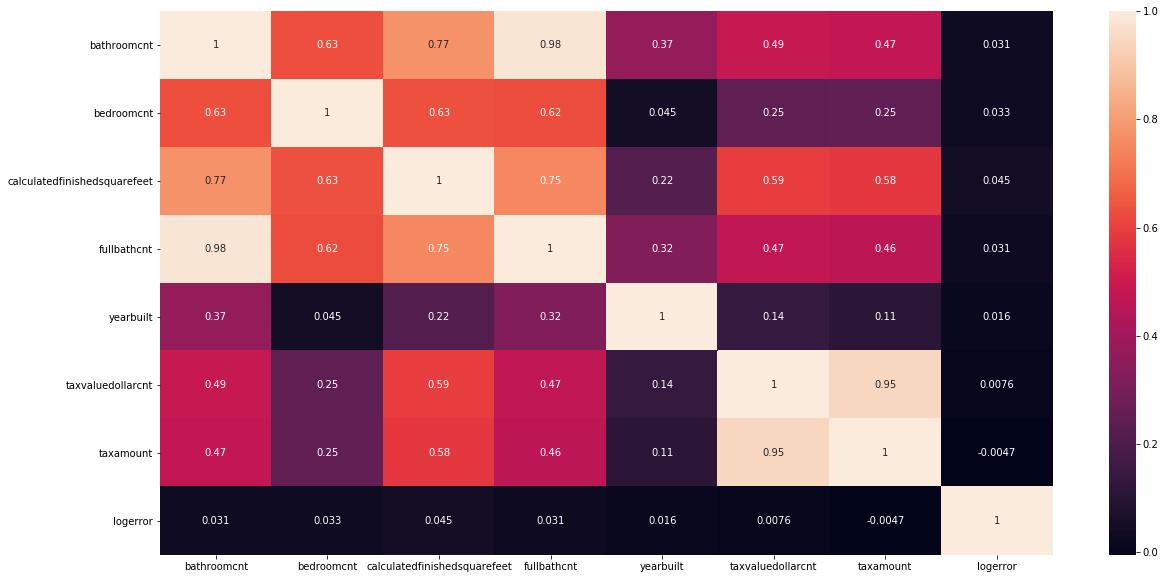

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), annot=True)


Create jointplots for all independent variables and `logerror`.

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local

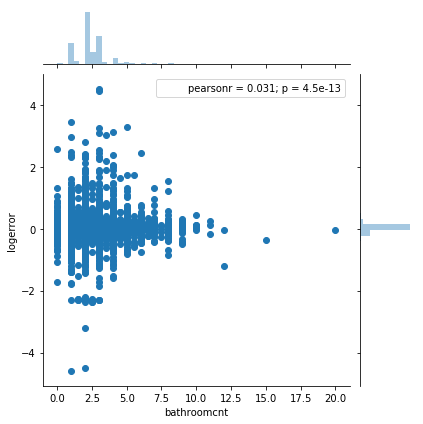

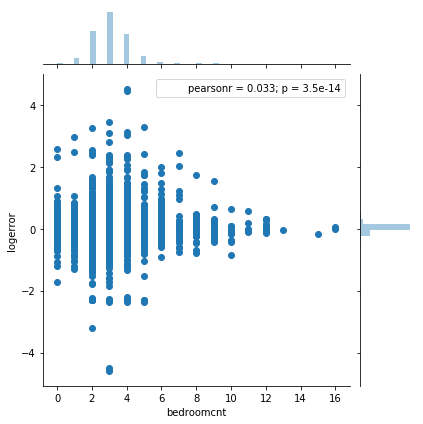

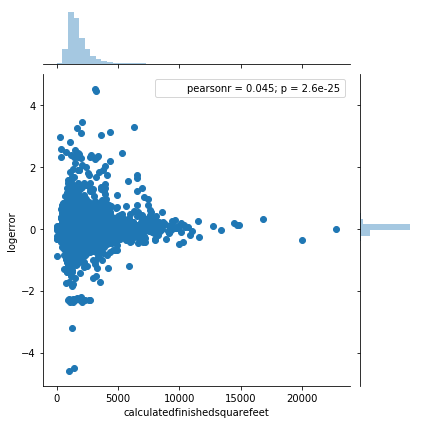

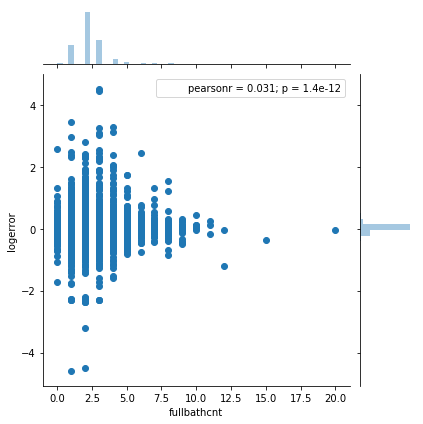

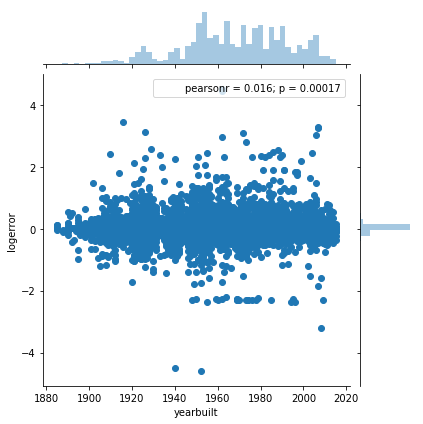

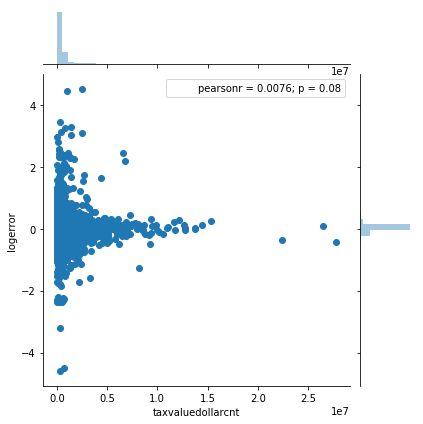

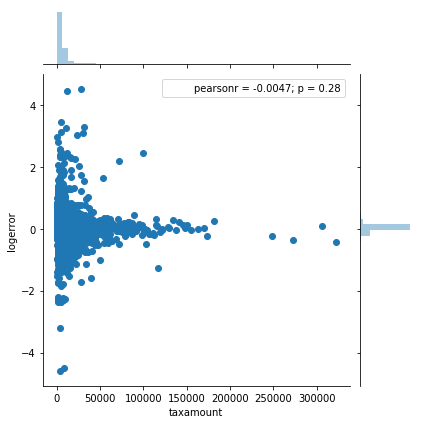

In [44]:
for column in X_train:
    sns.jointplot(X_train[column], y_train['logerror'], data=train).annotate(stats.pearsonr)

<Figure size 1440x1440 with 0 Axes>

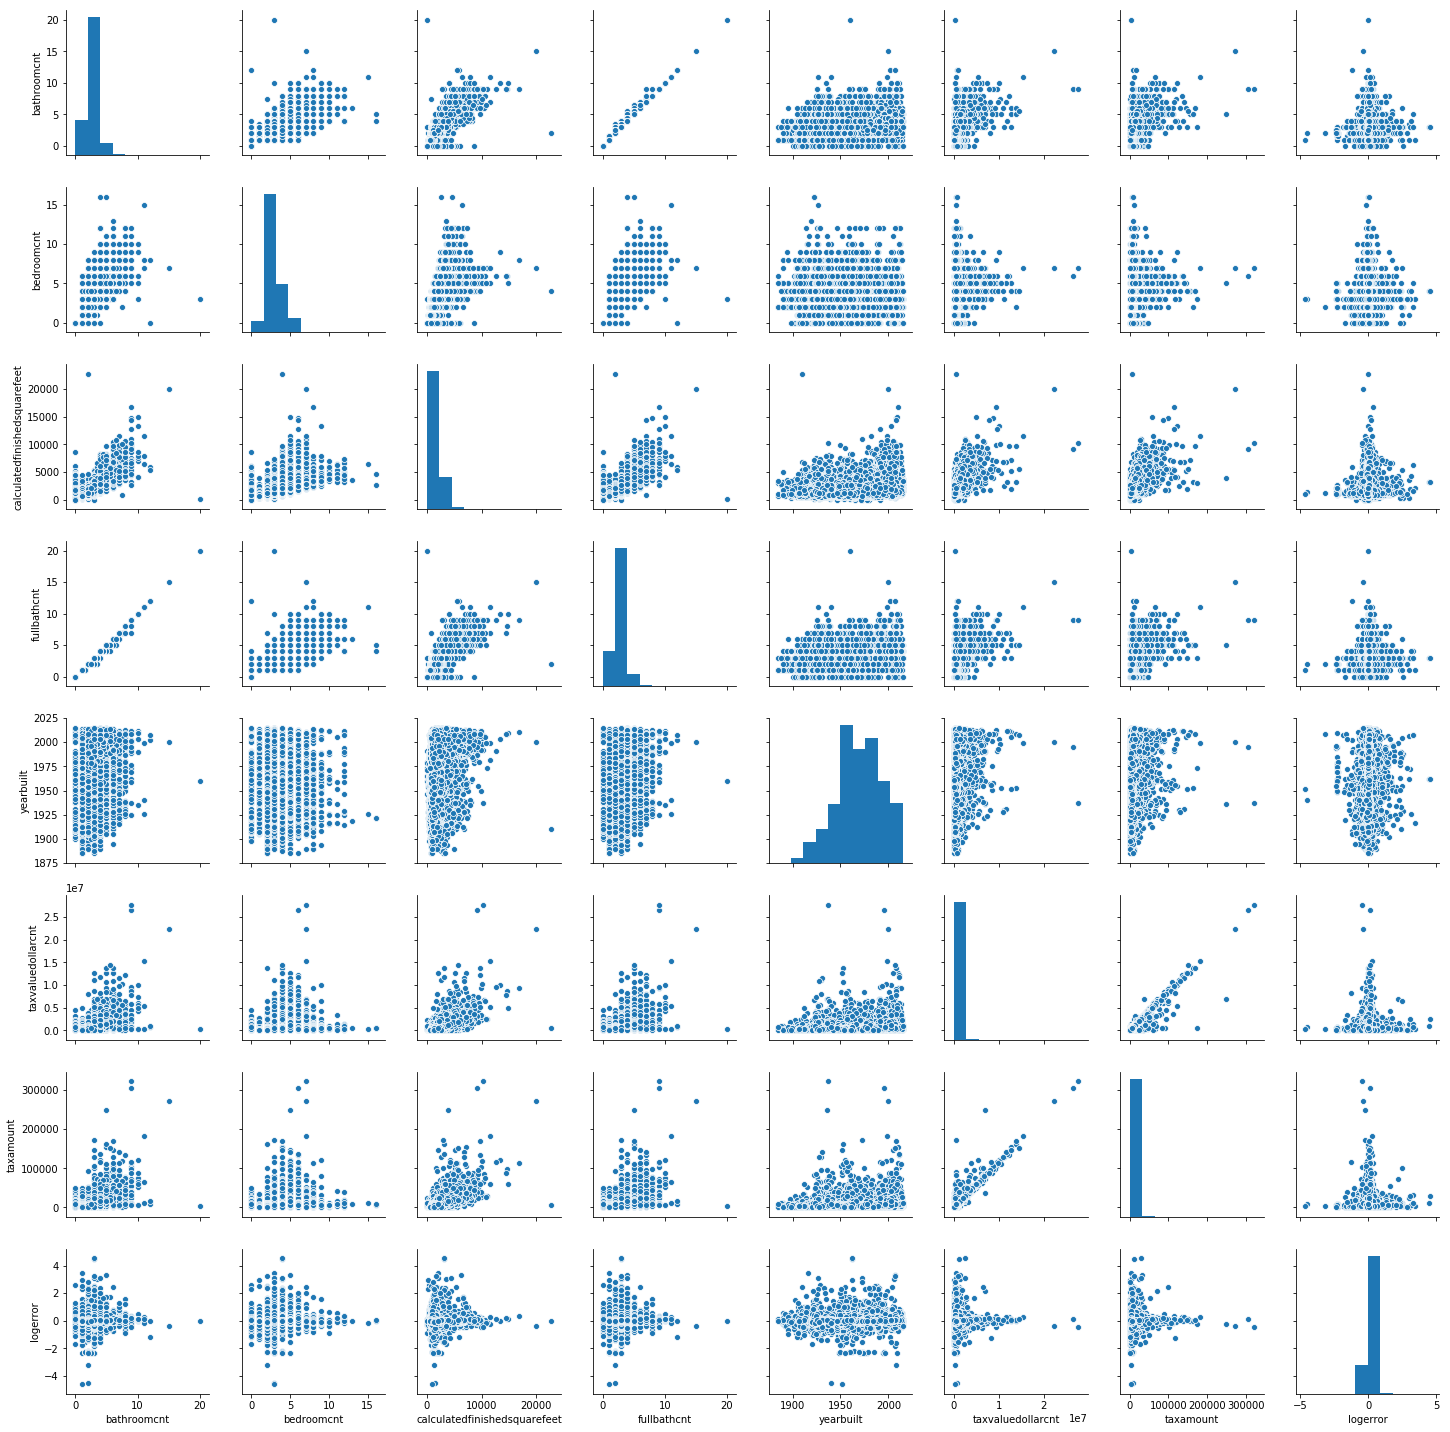

In [45]:
plt.figure(figsize=(20,20))
sns.pairplot(train)

After looking at the plots (heatmap, jointplots, pairplots), it doesn't seem like any of the independent variables have much of a correlation to `logerror`. This may be due to the data that was removed due to null values or potential outliers. After the initial regression model is made, further wrok can be done constructing models that ignore exclude outliers or include some of the attributes that were omitted. As for correlation between the independent variables, there is a strong correlation between `taxamount` and `taxvaluedollarcnt`. There is also a high correlation between `bathroomcnt` and `fullbathcnt`. `calculatedfinishedsquarefeet` has a correlation with the room count variables as well as the tax variables. After seeing these plots and the correlations, I think I will have to consider including other variables after creating this initial linear model.

Looking at different groups to determine if there is a difference in `logerror`.

Since data is min-max normalized, the values we want to group by need to be normalized i.e. for 3 bedrooms and 5 bedrooms, 3 and 5 need to be normalized.

In [46]:
joined_nonull.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror
count,8.934900e+04,89349.000000,89349.000000,89349.000000,89349.000000,89349.000000,8.934900e+04,89349.000000,89349.000000
mean,1.297910e+07,2.296730,3.053341,1772.008719,2.229057,1968.539066,4.577191e+05,5973.702289,0.011502
std,2.507548e+06,0.987205,1.128421,927.372036,0.973528,23.760946,5.530542e+05,6799.717097,0.159543
min,1.071174e+07,0.000000,0.000000,0.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000
25%,1.155877e+07,2.000000,2.000000,1183.000000,2.000000,1953.000000,2.004040e+05,2881.430000,-0.025300
50%,1.254587e+07,2.000000,3.000000,1540.000000,2.000000,1970.000000,3.436850e+05,4546.480000,0.006000
75%,1.422256e+07,3.000000,4.000000,2094.000000,3.000000,1987.000000,5.409870e+05,6896.710000,0.038300
max,1.629608e+08,20.000000,16.000000,22741.000000,20.000000,2015.000000,2.775000e+07,321936.090000,4.737000


Is there a difference in `logerror` between properties with 3 bathrooms vs. 5 or more bathrooms?

In [47]:
# def print_ttest_results(ttest, alpha=0.05):
#     print(f'The p-value is : {ttest[1]}')
#     if ttest[1] < alpha:
#         print('There is a significant difference.')
#     else:
#         print('Not significant.')

# bathmax = 20
# bathmin = 0
# threenorm = (3-0)/20
# fivenorm = (5-0)/20


# threebath = normalized_zillow.loc[normalized_zillow.bathroomcnt == threenorm]
# threebath.sample(10)

# fivebath = normalized_zillow.loc[normalized_zillow.bathroomcnt >= fivenorm]
# fivebath.sample(10)

# print_ttest_results(ttest_ind(threebath.logerror, fivebath.logerror))


Is there a difference in `logerror` between properties with 1500 finished squarefeet and more than 5000 finished square feet?

In [48]:
# squarefeetmin = 0
# squarefeetmax = 22741

# fifteenhunnorm = 1500/22741
# fivethousnorm = 5000/22741

# fifteenhunsf = normalized_zillow.loc[normalized_zillow.calculatedfinishedsquarefeet == fifteenhunnorm]

# fivethoussf = normalized_zillow.loc[normalized_zillow.calculatedfinishedsquarefeet >= fivethousnorm]

# print_ttest_results(ttest_ind(fifteenhunsf.logerror, fivethoussf.logerror))

Is there a difference in `logerror` between properties with 3 bedrooms and those with 5 or more bedrooms?

In [49]:
# bedmin = 0
# bedmax = 16

# threebednorm = 3/16
# fivebednorm = 5/16

# threebed = normalized_zillow.loc[normalized_zillow.bedroomcnt == threebednorm]

# fivebed = normalized_zillow.loc[normalized_zillow.bedroomcnt >= fivebednorm]

# print_ttest_results(ttest_ind(threebed.logerror, fivebed.logerror))

# Data Modeling

Feature Engineering: What features can be created to benefit the model?

In [50]:
train.describe()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror
count,53609.000000,53609.000000,53609.000000,53609.000000,53609.000000,5.360900e+04,53609.000000,53609.000000
mean,2.296583,3.055159,1772.647391,2.228152,1968.598202,4.587861e+05,5991.947693,0.011183
std,0.983791,1.125748,923.995739,0.970314,23.783620,5.677679e+05,7014.208502,0.158278
min,0.000000,0.000000,0.000000,0.000000,1885.000000,7.704000e+03,49.080000,-4.605000
25%,2.000000,2.000000,1186.000000,2.000000,1953.000000,1.997800e+05,2873.060000,-0.025300
50%,2.000000,3.000000,1543.000000,2.000000,1970.000000,3.432930e+05,4551.370000,0.006000
75%,3.000000,4.000000,2094.000000,3.000000,1987.000000,5.400000e+05,6892.910000,0.038300
max,20.000000,16.000000,22741.000000,20.000000,2015.000000,2.775000e+07,321936.090000,4.520000


In [51]:
joined_nonull.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror
count,8.934900e+04,89349.000000,89349.000000,89349.000000,89349.000000,89349.000000,8.934900e+04,89349.000000,89349.000000
mean,1.297910e+07,2.296730,3.053341,1772.008719,2.229057,1968.539066,4.577191e+05,5973.702289,0.011502
std,2.507548e+06,0.987205,1.128421,927.372036,0.973528,23.760946,5.530542e+05,6799.717097,0.159543
min,1.071174e+07,0.000000,0.000000,0.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000
25%,1.155877e+07,2.000000,2.000000,1183.000000,2.000000,1953.000000,2.004040e+05,2881.430000,-0.025300
50%,1.254587e+07,2.000000,3.000000,1540.000000,2.000000,1970.000000,3.436850e+05,4546.480000,0.006000
75%,1.422256e+07,3.000000,4.000000,2094.000000,3.000000,1987.000000,5.409870e+05,6896.710000,0.038300
max,1.629608e+08,20.000000,16.000000,22741.000000,20.000000,2015.000000,2.775000e+07,321936.090000,4.737000


Assessing what variables are important to the model by performing an ordinary least squares regression of all variables.

In [52]:
ols_model_1 = sm.OLS(y_train, X_train)
fit = ols_model_1.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     71.31
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          3.73e-103
Time:                        14:51:10   Log-Likelihood:                 22871.
No. Observations:               53609   AIC:                        -4.573e+04
Df Residuals:                   53602   BIC:                        -4.566e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
bathroomcnt                     -0.0048      0.004     -1.167      0.243      -0.013       0.003
bedroomcnt                       0.0003      0.001      0.391      0.696      -0.001       0.002
calculatedfinishedsquarefeet    1.2e-05   1.36e-06      8.801      0.000    9.32e-06    1.47e-05
fullbathcnt                      0.0037      0.004      0.916      0.360      -0.004       0.012
yearbuilt                    -1.272e-06   1.05e-06     -1.206      0.228   -3.34e-06    7.96e-07
taxvaluedollarcnt              2.57e-08   3.85e-09      6.671      0.000    1.81e-08    3.32e-08
taxamount                    -2.927e-06   3.07e-07     -9.533      0.000   -3.53e-06   -2.32e-06
==============================================================================
Omnibus:                    35954.084   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39188569.058
Skew:                           1.793   Prob(JB):                         0.00
Kurtosis:                     135.406   Cond. No.                     6.09e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# sm.OLS(y_train, X_train.drop(['bathroomcnt', 'calculatedfinishedsquarefeet'], axis=1)).fit().summary()

In [54]:
# sm.OLS(y_train, X_train.drop(['bathroomcnt', 'calculatedfinishedsquarefeet', 'taxamount'], axis=1)).fit().summary()

After looking at the OLS model, all variables have a significant affect on `logerror` according to the p-values given.Due to this, the features with the highest t-value will be hosen for the initial model. In this case, those features are `bedroomcnt`, `yearbuilt`, and `in_california`. Once this is done I can add other features who have smaller t-values or remove some current features.

## Model 1

In [144]:
lm1 = LinearRegression(fit_intercept=True) 

In [145]:
lm1.fit(X_train[['calculatedfinishedsquarefeet', 'taxamount']], y_train)

lm1int = lm1.intercept_
print(lm1int)

lm1co = lm1.coef_
print(lm1co)

[-0.00436393]
[[ 1.2314320e-05 -1.0484565e-06]]


In [146]:
lm1_train_pred = lm1.predict(X_train[['calculatedfinishedsquarefeet', 'taxamount']])

In [147]:
MSE = mean_squared_error(y_train, lm1_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm1_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm1_train_pred)
print(f'R^2 is: {R2}')

lowestMSE = MSE
lowestMAE = MAE
highestR2 = R2

Mean squared error is: 0.02496526385190884
Median absolute error is: 0.03259156527906008
R^2 is: 0.003443098875821393


Those are disappointing numbers. MSE and MAE are small, but that's probably due to `logerror` itself being small. $R^2$ shows that the predicted `logerror` from my model was way off from what the true `logerror` values were.

## Model 2

Model 1 was disappointing. Model 2 will use variables based off of domain knowledge. What variables make sense when thinking of what can cause differences in price and estimate? I will use `taxamount`, `bedroomcnt`, and `calculatedfinishedsquarefeet`.

In [148]:
lm2 = LinearRegression(fit_intercept=True)

In [149]:
lm2.fit(X_train[['taxamount', 'yearbuilt', 'calculatedfinishedsquarefeet']], y_train)

lm2int = lm2.intercept_
print(lm2int)

lm2co = lm2.coef_
print(lm2co)

[-0.0863261]
[[-1.04580129e-06  4.18459526e-05  1.20708376e-05]]


In [150]:
lm2_train_pred = lm2.predict(X_train[['taxamount', 'yearbuilt', 'calculatedfinishedsquarefeet']])

In [151]:
MSE = mean_squared_error(y_train, lm2_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm2_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm2_train_pred)
print(f'R^2 is: {R2}')

print('\n')

if MSE < lowestMSE:
    lowestMSE = MSE
    print('This MSE is the lowest MSE.')
else:
    print('This MSE is not the lowest MSE.')
    
if MAE < lowestMAE:
    lowestMSE = MAE
    print('This MAE is the lowest MAE.')
else:
    print('This MAE is not the lowest MAE.')
    
if R2 > highestR2:
    highestR2 = R2
    print('This R2 is the highest R2.')
else:
    print('This R2 is not the highest R2.')

Mean squared error is: 0.02496431943997899
Median absolute error is: 0.032684175207405075
R^2 is: 0.0034807976652986294


This MSE is the lowest MSE.
This MAE is not the lowest MAE.
This R2 is the highest R2.


At least $R^2$ improved and both MSE and MAE decreased. Since `bedroomcnt` had the lowest coefficient, and thus the smallest impact on `logerror`, it will be removed and replaced with something else.

## Model 3

Model 2 was slightly better than Model 1. Model 3 will replace `bedroomcnt` with `taxvaluedollarcnt` since it is directly related to the property value.

In [152]:
lm3 = LinearRegression()

In [153]:
lm3.fit(X_train[['calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt', 'taxamount']], y_train)

lm3int = lm3.intercept_
print(lm2int)

lm3co = lm3.coef_
print(lm2co)

[-0.0863261]
[[-1.04580129e-06  4.18459526e-05  1.20708376e-05]]


In [154]:
lm3_train_pred = lm3.predict(X_train[['calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt', 'taxamount']])

In [155]:
MSE = mean_squared_error(y_train, lm3_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm3_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm3_train_pred)
print(f'R^2 is: {R2}')

print('\n')

if MSE < lowestMSE:
    lowestMSE = MSE
    print('This MSE is the lowest MSE.')
else:
    print('This MSE is not the lowest MSE.')
    
if MAE < lowestMAE:
    lowestMSE = MAE
    print('This MAE is the lowest MAE.')
else:
    print('This MAE is not the lowest MAE.')
    
if R2 > highestR2:
    highestR2 = R2
    print('This R2 is the highest R2.')
else:
    print('This R2 is not the highest R2.')

Mean squared error is: 0.02496430014108185
Median absolute error is: 0.03267447061403969
R^2 is: 0.003481568033648963


This MSE is the lowest MSE.
This MAE is not the lowest MAE.
This R2 is the highest R2.


## Model 4

Removed engineered feature due to misunderstanding of data. This should be seen as linear model 1, but for sake of preserving work, it will be linear model 4. That said, this model will have all variables in it except for `regionidzip`.

In [156]:
lm4 = LinearRegression()

In [157]:
lm4.fit(X_train, y_train)

lm4int = lm4.intercept_
print(lm4int)

lm4co = lm4.coef_
print(lm4co)

[-0.11993973]
[[-7.58254668e-03  7.33267867e-04  1.20685659e-05  5.59885071e-03
   5.99726436e-05  2.54972484e-08 -2.89256151e-06]]


In [158]:
lm4_train_pred = lm4.predict(X_train)

In [159]:
MSE = mean_squared_error(y_train, lm4_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm4_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm4_train_pred)
print(f'R^2 is: {R2}')

print('\n')

if MSE < lowestMSE:
    lowestMSE = MSE
    print('This MSE is the lowest MSE.')
else:
    print('This MSE is not the lowest MSE.')
    
if MAE < lowestMAE:
    lowestMSE = MAE
    print('This MAE is the lowest MAE.')
else:
    print('This MAE is not the lowest MAE.')
    
if R2 > highestR2:
    highestR2 = R2
    print('This R^2 is the highest R2.')
else:
    print('This R^2 is not the highest R2.')

Mean squared error is: 0.024942695212601045
Median absolute error is: 0.032680758980994
R^2 is: 0.004343987942509453


This MSE is the lowest MSE.
This MAE is not the lowest MAE.
This R^2 is the highest R2.
